# Working with Data Sets
### Machine Learning 
### CUNEF - MS Data Science for Finance
by José María Álvarez Silva

Start Date: 31/10/2019

Update Date: 08/11/2019

### Data Set
* Economic Indicators

### Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data
##### Data Path / Data Name

In [5]:
dataPathName = "Data/econ.csv"

##### Load Data

In [6]:
data = pd.read_csv(dataPathName, parse_dates = ["Period"])
data.head()

,Period,ConsConf,CompLead,BusConf,Emp,InvToSales,PMI,SP500,MfgOrdDur,BldgPerm,Sales,FedFunds,DJI,Payroll,PersCons
0,2007-01-01,100.8497,101.4669,99.40803,72.11646,1.31,49.5,1424.16,217697,1626,327125,5.25,12621.69,135335,9553.1
1,2007-02-01,100.6274,101.5683,99.51553,71.97358,1.30,51.9,1444.80,222033,1598,328076,5.26,12268.63,136026,9590.8
2,2007-03-01,100.3566,101.6771,99.64309,71.99528,1.28,50.7,1406.95,228802,1596,330800,5.26,12354.35,136922,9631.6
3,2007-04-01,100.1832,101.7829,99.82444,71.70923,1.28,52.6,1463.64,231816,1470,329653,5.25,13062.91,137730,9670.6
4,2007-05-01,100.1231,101.8653,99.93272,71.76241,1.28,52.5,1511.14,227263,1493,334135,5.25,13627.64,138673,9708.9


##### Data Dictionary

1. __Period__
    * Monthly data in format: YYYY-MM.
2. __ConsConf__
    * The consumer confidence index (CCI) is based on households' plans for major purchases and their economic situation, both currently and their expectations for the immediate future.
3. __Complead__
    * The composite leading indicator (CLI) is designed to provide early signals of turning points in business cycles showing fluctuation of the economic activity around its long term potential level. CLIs show short-term economic movements in qualitative rather than quantitative terms.
4. __BusConf__
    * The business confidence index (BCI) is based on enterprises' assessment of production, orders and stocks, as well as its current position and expectations for the immediate future. Opinions compared to a “normal” state are collected and the difference between positive and negative answers provides a qualitative index on economic conditions.
5. __Emp__
    * Employment rates are defined as a measure of the extent to which available labour resources (people available to work) are being used.
6. __InvToSales__
    * Inventory turnover is a ratio showing how many times a company's inventory is sold and replaced over a period of time. The days in the period can then be divided by the inventory turnover formula to calculate the days it takes to sell the inventory on hand. It is calculated as sales divided by average inventory.
7. __PMI__
    * The Purchasing Managers' Index (PMI) is an indicator of the economic health of the manufacturing sector. The PMI is based on five major indicators: new orders, inventory levels, production, supplier deliveries and the employment environment.
8. __SP500__
    * The Standard & Poor's 500, often abbreviated as the S&P 500, or just the S&P, is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ.
9. __MfgOrdDur__
    * “The Advance Report on Durable Goods Manufacturer's Shipments, Inventories and Orders,” or the Durable Goods Report, provides data on new orders received from more than 4,000 manufacturers of durable goods, which are generally defined as higher-priced capital goods orders with a useful life of three years or more, such as cars, semiconductor equipment and turbines.
10. __BldgPerm__
    * A type of authorization that must be granted by a government or other regulatory body before the construction of a new or existing building can legally occur.
11. __Sales__
    * Advance Retail Sales: Retail (Excluding Food Services).
12. __FedFunds__
    * Federal funds interest rate at which depository institutions (banks and credit unions) lend reserve balances to other depository institutions overnight, on an uncollateralized basis.
13. __DJI__
    * The Dow Jones Industrial Average (DJIA) is a price-weighted average of 30 significant stocks traded on the New York Stock Exchange (NYSE) and the NASDAQ.
14. __Payroll__
    * All Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.
15. __PersCons__
    * Personal consumption expenditures (PCE) is the primary measure of consumer spending on goods and services in the U.S. economy. It accounts for about two-thirds of domestic final spending, and thus it is the primary engine that drives future economic growth.

In [5]:
list(data)

['Period',
 'ConsConf',
 'CompLead',
 'BusConf',
 'Emp',
 'InvToSales',
 'PMI',
 'SP500',
 'MfgOrdDur',
 'BldgPerm',
 'Sales',
 'FedFunds',
 'DJI',
 'Payroll',
 'PersCons']

In [6]:
data.dtypes

Period        datetime64[ns]
ConsConf             float64
CompLead             float64
BusConf              float64
Emp                  float64
InvToSales           float64
PMI                  float64
SP500                float64
MfgOrdDur              int64
BldgPerm               int64
Sales                  int64
FedFunds             float64
DJI                  float64
Payroll                int64
PersCons             float64
dtype: object

### Exploratory Data Analysis

* __Returns Correlation__
    * To understand the relationship between the variables, their changes are caculated and we measure the correlation to expleain the realationship of the variables via the way they change as time move.

In [7]:
data1 = data.iloc[:,1:]
# shift moves dates back by 1
data_change = data1.apply(lambda x: np.log(x) - np.log(x.shift(1)))
data_change.head()

,ConsConf,CompLead,BusConf,Emp,InvToSales,PMI,SP500,MfgOrdDur,BldgPerm,Sales,FedFunds,DJI,Payroll,PersCons
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.002207,0.000999,0.001081,-0.001983,-0.007663,0.047346,0.014389,0.019722,-0.017370,0.002903,0.001903,-0.028371,0.005093,0.003939
2,-0.002695,0.001071,0.001281,0.000301,-0.015504,-0.023393,-0.026547,0.030031,-0.001252,0.008269,0.000000,0.006963,0.006565,0.004245
3,-0.001729,0.001040,0.001818,-0.003981,0.000000,0.036790,0.039502,0.013087,-0.082238,-0.003473,-0.001903,0.055769,0.005884,0.004041
4,-0.000600,0.000809,0.001084,0.000741,0.000000,-0.001903,0.031938,-0.019836,0.015525,0.013505,0.000000,0.042323,0.006823,0.003953


In [8]:
x = data_change.corr().style.background_gradient(cmap='summer').set_precision(2)


__Plots__
* __Time Series__
* __Histogram__
* __Log Return Time Series__
* __Log Return Histogram__

__The consumer confidence index (CCI)__

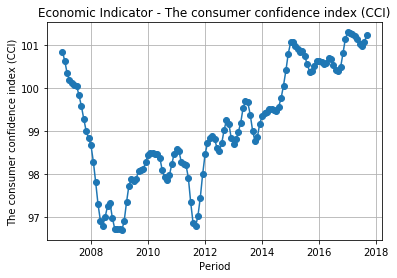

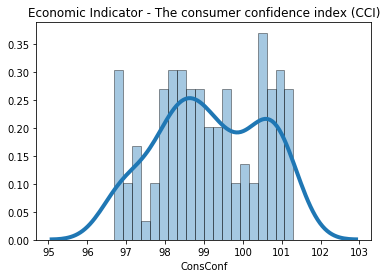

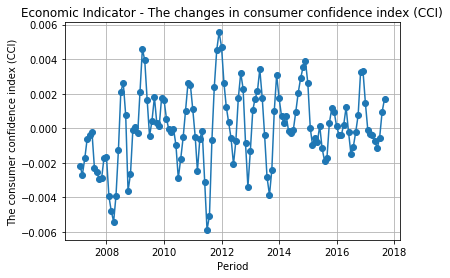

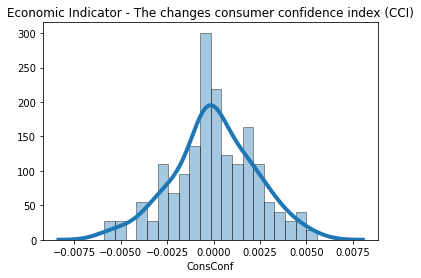

In [34]:
plt.plot_date(data.Period, data.ConsConf, linestyle = "solid")
plt.title('Economic Indicator - The consumer confidence index (CCI)')
plt.ylabel('The consumer confidence index (CCI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.ConsConf, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The consumer confidence index (CCI)')
plt.show()

plt.plot_date(data.Period, data_change.ConsConf, linestyle = "solid")
plt.title('Economic Indicator - The changes in consumer confidence index (CCI)')
plt.ylabel('The consumer confidence index (CCI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.ConsConf, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes consumer confidence index (CCI)')
plt.show()



__The composite leading indicator (CLI)__ Complead

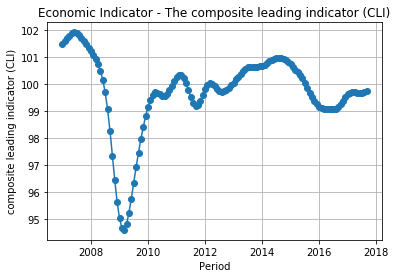

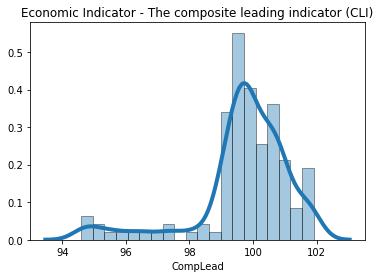

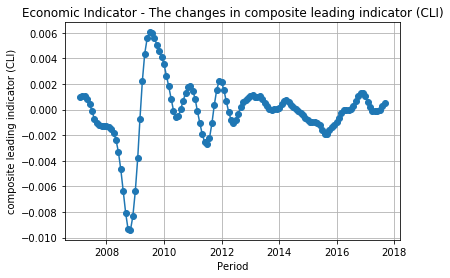

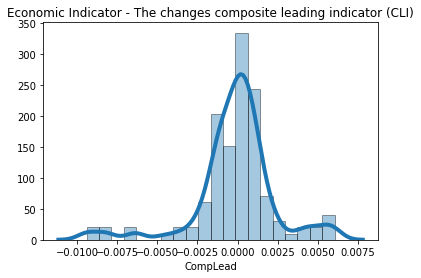

In [15]:
plt.plot_date(data.Period, data.CompLead, linestyle = "solid")
plt.title('Economic Indicator - The composite leading indicator (CLI)')
plt.ylabel('composite leading indicator (CLI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.CompLead, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The composite leading indicator (CLI)')
plt.show()

plt.plot_date(data.Period, data_change.CompLead, linestyle = "solid")
plt.title('Economic Indicator - The changes in composite leading indicator (CLI)')
plt.ylabel('composite leading indicator (CLI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.CompLead, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes composite leading indicator (CLI)')
plt.show()



__The business confidence index (BCI)__ BusConf

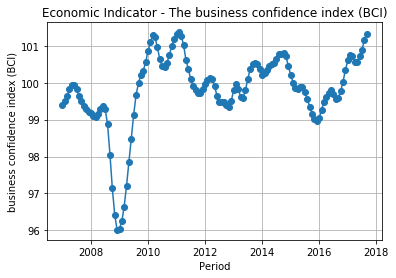

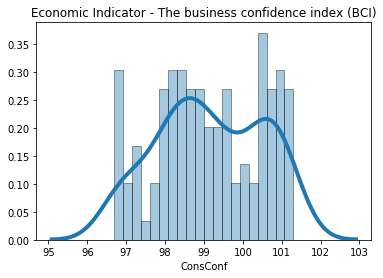

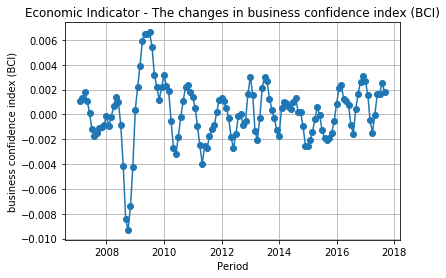

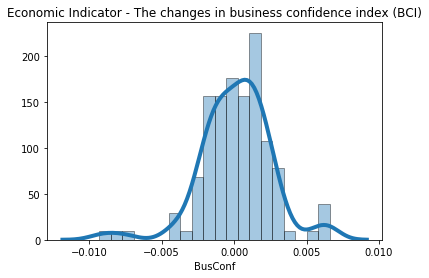

In [16]:
plt.plot_date(data.Period, data.BusConf, linestyle = "solid")
plt.title('Economic Indicator - The business confidence index (BCI)')
plt.ylabel('business confidence index (BCI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.ConsConf, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The business confidence index (BCI)')
plt.show()

plt.plot_date(data.Period, data_change.BusConf, linestyle = "solid")
plt.title('Economic Indicator - The changes in business confidence index (BCI)')
plt.ylabel('business confidence index (BCI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.BusConf, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes in business confidence index (BCI)')
plt.show()



__Employment rates__ Emp                  

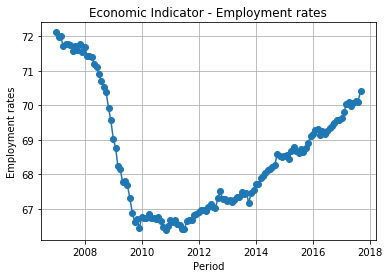

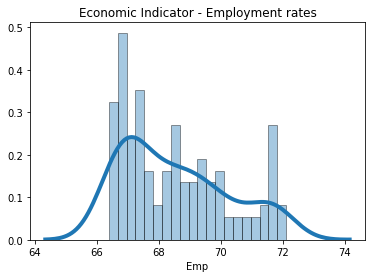

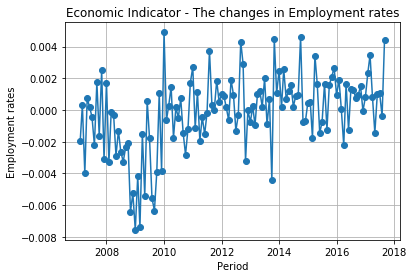

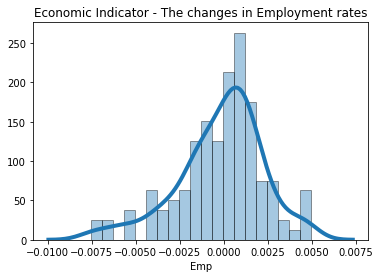

In [17]:
plt.plot_date(data.Period, data.Emp, linestyle = "solid")
plt.title('Economic Indicator - Employment rates')
plt.ylabel('Employment rates')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.Emp, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Employment rates')
plt.show()

plt.plot_date(data.Period, data_change.Emp, linestyle = "solid")
plt.title('Economic Indicator - The changes in Employment rates')
plt.ylabel('Employment rates')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.Emp, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes in Employment rates')
plt.show()



__Inventory turnover__ InvToSales           

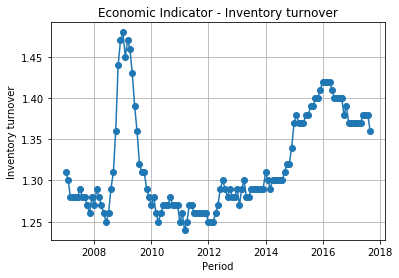

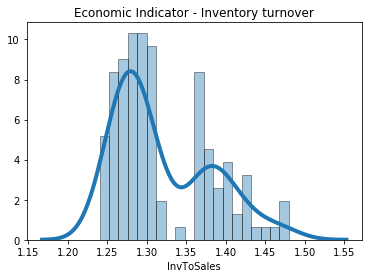

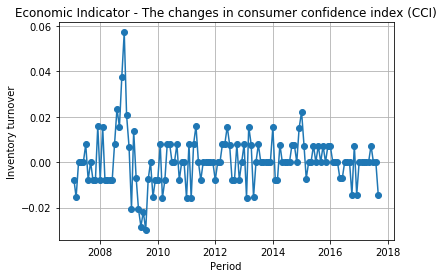

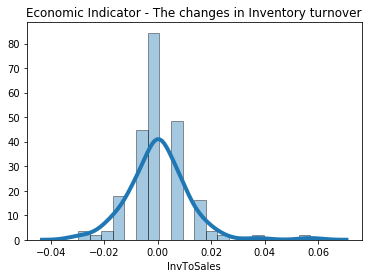

In [18]:
plt.plot_date(data.Period, data.InvToSales, linestyle = "solid")
plt.title('Economic Indicator - Inventory turnover')
plt.ylabel('Inventory turnover')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.InvToSales, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Inventory turnover')
plt.show()

plt.plot_date(data.Period, data_change.InvToSales, linestyle = "solid")
plt.title('Economic Indicator - The changes in consumer confidence index (CCI)')
plt.ylabel('Inventory turnover')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.InvToSales, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes in Inventory turnover')
plt.show()



__The Purchasing Managers' Index (PMI)__ PMI

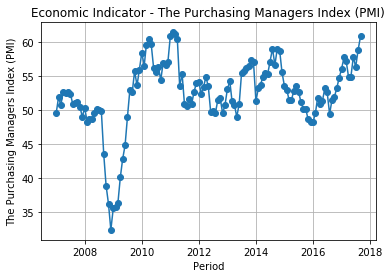

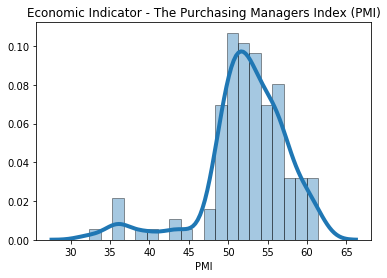

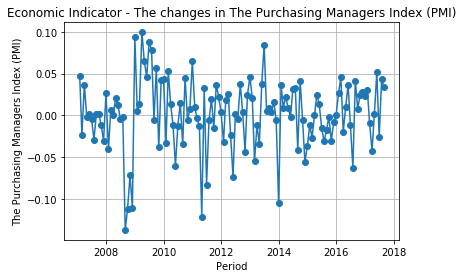

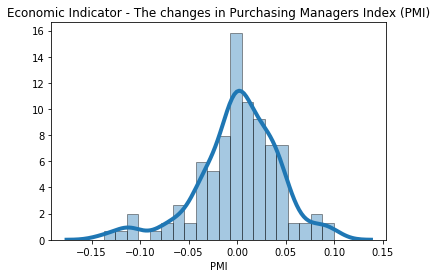

In [20]:
plt.plot_date(data.Period, data.PMI, linestyle = "solid")
plt.title('Economic Indicator - The Purchasing Managers Index (PMI)')
plt.ylabel('The Purchasing Managers Index (PMI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.PMI, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The Purchasing Managers Index (PMI)')
plt.show()

plt.plot_date(data.Period, data_change.PMI, linestyle = "solid")
plt.title('Economic Indicator - The changes in The Purchasing Managers Index (PMI)')
plt.ylabel('The Purchasing Managers Index (PMI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.PMI, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes in Purchasing Managers Index (PMI)')
plt.show()



__The Standard & Poor's 500__ SP500                

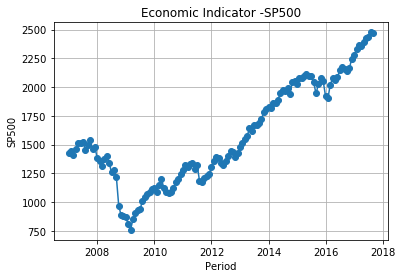

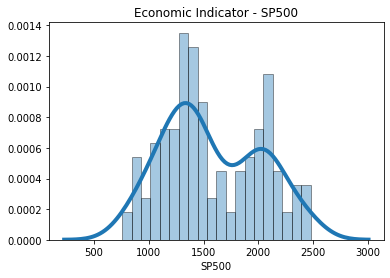

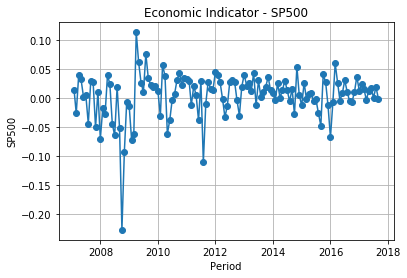

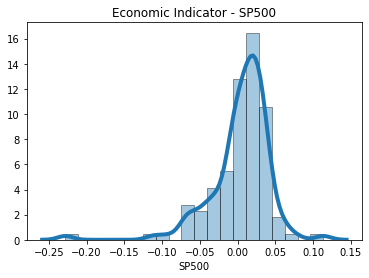

In [21]:
plt.plot_date(data.Period, data.SP500, linestyle = "solid")
plt.title('Economic Indicator -SP500')
plt.ylabel('SP500')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.SP500, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - SP500')
plt.show()

plt.plot_date(data.Period, data_change.SP500, linestyle = "solid")
plt.title('Economic Indicator - SP500')
plt.ylabel('SP500')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.SP500, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - SP500')
plt.show()



__The Advance Report on Durable Goods Manufacturer's Shipments, Inventories and Orders__ MfgOrdDur              

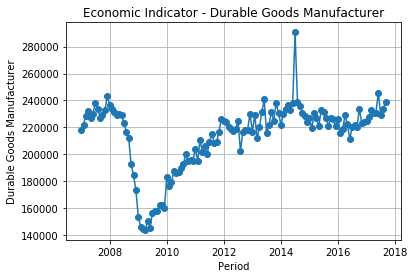

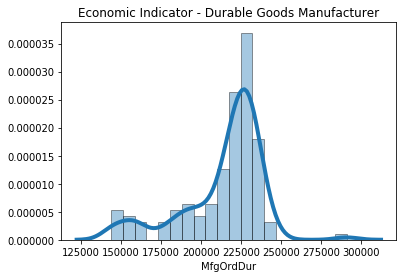

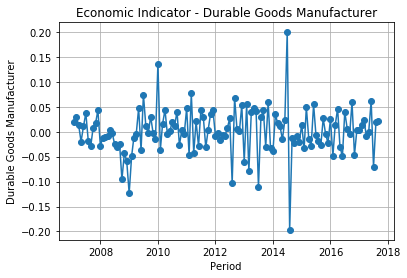

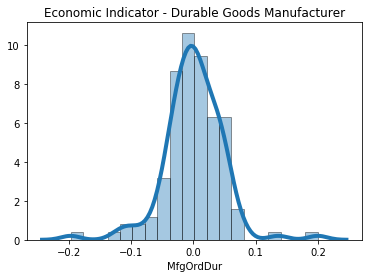

In [22]:
plt.plot_date(data.Period, data.MfgOrdDur, linestyle = "solid")
plt.title('Economic Indicator - Durable Goods Manufacturer')
plt.ylabel('Durable Goods Manufacturer')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.MfgOrdDur, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Durable Goods Manufacturer')
plt.show()

plt.plot_date(data.Period, data_change.MfgOrdDur, linestyle = "solid")
plt.title('Economic Indicator - Durable Goods Manufacturer')
plt.ylabel('Durable Goods Manufacturer')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.MfgOrdDur, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Durable Goods Manufacturer')
plt.show()



__BldgPerm__ BldgPerm

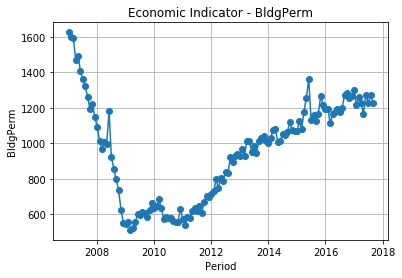

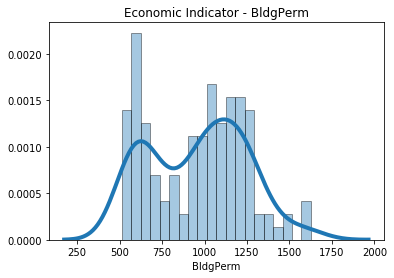

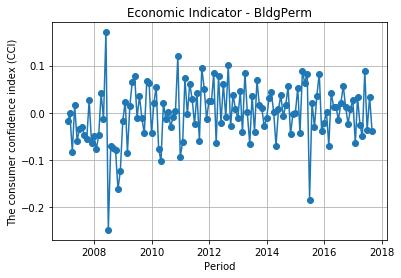

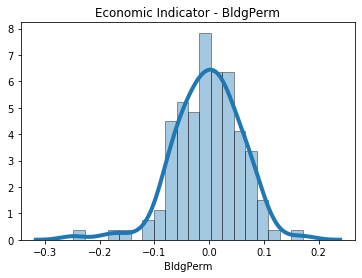

In [23]:
plt.plot_date(data.Period, data.BldgPerm, linestyle = "solid")
plt.title('Economic Indicator - BldgPerm')
plt.ylabel('BldgPerm')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.BldgPerm, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - BldgPerm')
plt.show()

plt.plot_date(data.Period, data_change.BldgPerm, linestyle = "solid")
plt.title('Economic Indicator - BldgPerm')
plt.ylabel('The consumer confidence index (CCI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.BldgPerm, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - BldgPerm')
plt.show()



__Advance Retail Sales: Retail (Excluding Food Services)__ Sales                  

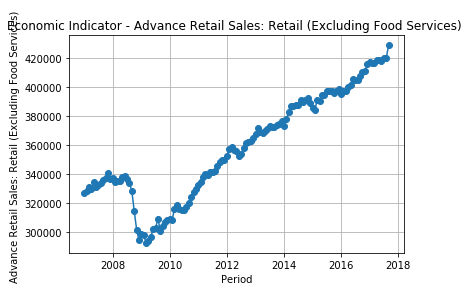

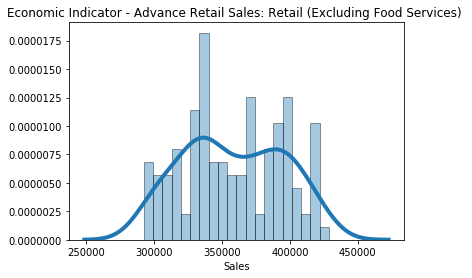

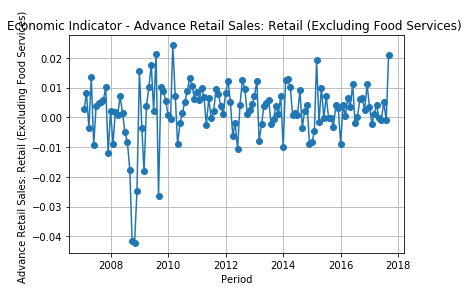

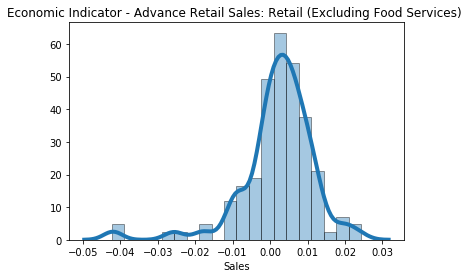

In [24]:
plt.plot_date(data.Period, data.Sales, linestyle = "solid")
plt.title('Economic Indicator - Advance Retail Sales: Retail (Excluding Food Services) ')
plt.ylabel('Advance Retail Sales: Retail (Excluding Food Services) ')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.Sales, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Advance Retail Sales: Retail (Excluding Food Services) ')
plt.show()

plt.plot_date(data.Period, data_change.Sales, linestyle = "solid")
plt.title('Economic Indicator - Advance Retail Sales: Retail (Excluding Food Services) ')
plt.ylabel('Advance Retail Sales: Retail (Excluding Food Services) ')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.Sales, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Advance Retail Sales: Retail (Excluding Food Services) ')
plt.show()



__Federal funds interest rate__ FedFunds

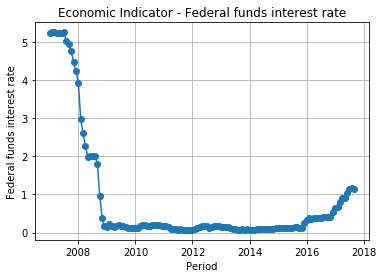

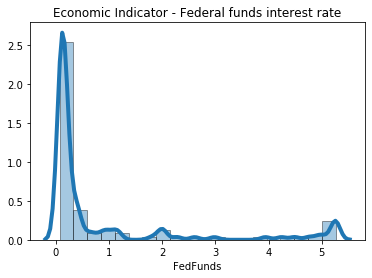

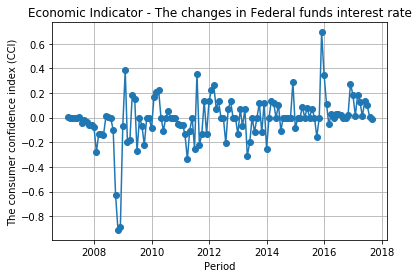

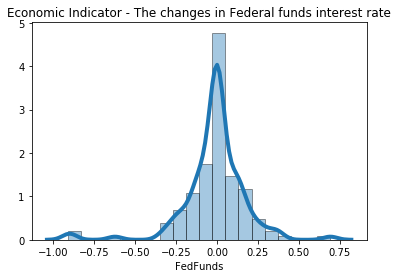

In [25]:
plt.plot_date(data.Period, data.FedFunds, linestyle = "solid")
plt.title('Economic Indicator - Federal funds interest rate')
plt.ylabel('Federal funds interest rate')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.FedFunds, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Federal funds interest rate')
plt.show()

plt.plot_date(data.Period, data_change.FedFunds, linestyle = "solid")
plt.title('Economic Indicator - The changes in Federal funds interest rate')
plt.ylabel('The consumer confidence index (CCI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.FedFunds, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes in Federal funds interest rate')
plt.show()



__The Dow Jones Industrial Average (DJIA)__ DJI

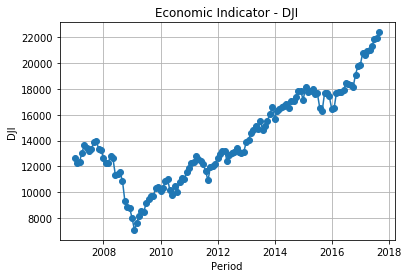

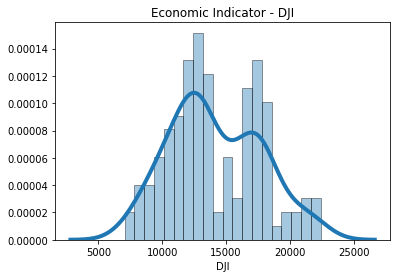

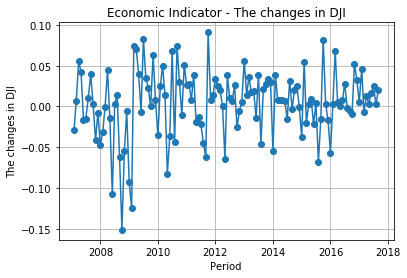

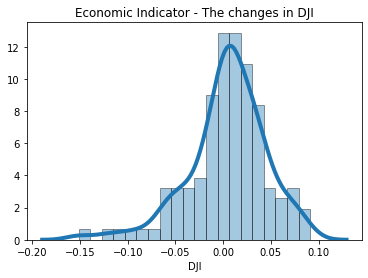

In [28]:
plt.plot_date(data.Period, data.DJI, linestyle = "solid")
plt.title('Economic Indicator - DJI')
plt.ylabel('DJI')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.DJI, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - DJI')
plt.show()

plt.plot_date(data.Period, data_change.DJI, linestyle = "solid")
plt.title('Economic Indicator - The changes in DJI')
plt.ylabel('The changes in DJI')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.DJI, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes in DJI')
plt.show()



__Total Nonfarm Payroll__ Payroll

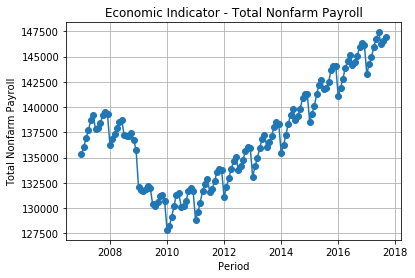

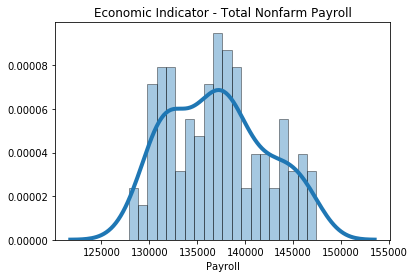

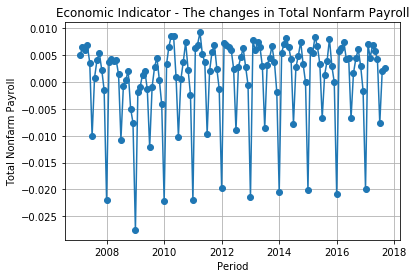

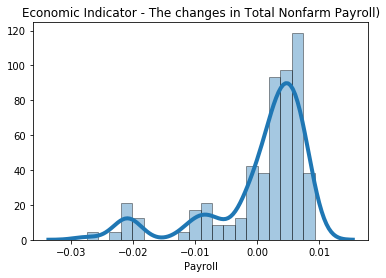

In [27]:
plt.plot_date(data.Period, data.Payroll, linestyle = "solid")
plt.title('Economic Indicator - Total Nonfarm Payroll')
plt.ylabel('Total Nonfarm Payroll')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.Payroll, hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Total Nonfarm Payroll')
plt.show()

plt.plot_date(data.Period, data_change.Payroll, linestyle = "solid")
plt.title('Economic Indicator - The changes in Total Nonfarm Payroll')
plt.ylabel('Total Nonfarm Payroll')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.Payroll, hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes in Total Nonfarm Payroll)')
plt.show()



__Personal consumption expenditures (PCE)__ PersCons             

In [ ]:
plt.plot_date(data.Period, data.PersCons     , linestyle = "solid")
plt.title('Economic Indicator - Personal consumption expenditures (PCE)')
plt.ylabel('Personal consumption expenditures (PCE)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data.PersCons     , hist=True, kde=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - Personal consumption expenditures (PCE)')
plt.show()

plt.plot_date(data.Period, data_change.PersCons     , linestyle = "solid")
plt.title('Economic Indicator - The changes in Personal consumption expenditures (PCE)')
plt.ylabel('The consumer confidence index (CCI)')
plt.xlabel('Period')
plt.grid(True)
plt.show()

sns.distplot(data_change.PersCons     , hist=True, 
             bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Economic Indicator - The changes consumer confidence index (CCI)')
plt.show()

